<h1 style="color:darkolivegreen"> Plotly examples 1  </h1>


In [64]:
import math 
import scipy
import peakutils
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
#import cufflinks as cf

#import plotly.plotly as py   #deprecated! --> chartstudio
import chart_studio
#chart_studio.plotly.set_credentials_file(username='PlotGia', api_key='uZpccCDpCT6s8Vvp6KPD')

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import init_notebook_mode

In [34]:
# Initialize Plotly offline mode in Jupyter notebook, connected=True parameter enables connecting chart studio for saving plots
plotly.offline.init_notebook_mode(connected=True)
# Sets the credentials for connecting to your Plotly chart studio account
chart_studio.tools.set_credentials_file(username='Giac', api_key='lr1c37zw')
df = pd.read_csv('./data/datas.csv')
df[:4]

,100,0.0348
0,200,0.0299
1,500,0.0332
2,423,0.0666
3,652,0.0452


In [35]:
my_data_get = np.genfromtxt('./data/datas.csv', delimiter=',')
#or 
my_data_load = np.loadtxt('./data/datas.csv', delimiter=',')

print(my_data_get[:5])
print(my_data_load[:5])

[[1.00e+02 3.48e-02]
 [2.00e+02 2.99e-02]
 [5.00e+02 3.32e-02]
 [4.23e+02 6.66e-02]
 [6.52e+02 4.52e-02]]
[[1.00e+02 3.48e-02]
 [2.00e+02 2.99e-02]
 [5.00e+02 3.32e-02]
 [4.23e+02 6.66e-02]
 [6.52e+02 4.52e-02]]


In [36]:
x = my_data_get[:,0]
y = my_data_get[:,1]
z = my_data_get[0,:]

x, y, len(x), len(y)

(array([ 100.,  200.,  500.,  423.,  652.,  786.,  802.,  883.,  958.,
        1073., 1245., 1352., 1658., 1763., 1824., 1932., 2004., 2421.,
        2571.]),
 array([0.0348, 0.0299, 0.0332, 0.0666, 0.0452, 0.0578, 0.0182, 0.0265,
        0.0265, 0.0247, 0.0452, 0.0265, 0.0265, 0.0247, 0.0452, 0.0685,
        0.0852, 0.0856, 0.0885]),
 19,
 19)

In [37]:
def SlidingWindow(y, winsize, threshold, influence,lag):
    """ Detect outliers in a signal y using a sliding window approach.
        1. Point exceeding threshold of window std dev
        2. Increasing trend in lagging window  
        3. Height above avg exceeds minimum  
    
    Parameters:
        - Input signal y [ndarray]
        - Size of sliding window [int]
        - Threshold for outlier detection in std devs  [float]
        - Influence parameter for EWMA filtering [float]
        - Lag window size [int]

    Returns: 
        - Dictionary with:
            - signals: Binary array indicating outliers
            - index: Indices of outliers
            - height: Height above threshold
    """
    ##### Initialations
    signals = np.zeros(len(y))
    runningAvg = [0]*len(y)
    runningStd = [0]*len(y)
    index = []
    height = []
    lagTemp = []
    # Copy of input data
    filteredY = np.array(y)
    # Calculate initial running avg and std  
    runningAvg[winsize - 1] = np.mean(y[0:winsize])
    runningStd[winsize - 1] = np.std(y[0:winsize])
    
    for i in range(winsize, len(y)-lag):
        # Check if point exceeds threshold
        if (y[i] - runningAvg[i-1]) > threshold * runningStd[i-1]:
            # Get lagging window
            lagTemp = np.array(y[i-lag:i+lag+1])
            # Calculate differences
            trend = lagTemp[1:]-lagTemp[:-1]   
            # Check increasing trend         
            if np.array_equal(trend[:lag],trend[trend>0]) and (y[i]-runningAvg[i-1])>3:
                ### Mark outlier 
                signals[i] = 1 
                index.append(i)
                height.append(y[i] - runningAvg[i-1])          
            # Create filtered value  
            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            # Update running avg and std
            runningAvg[i] = np.mean(filteredY[(i-winsize):i])
            runningStd[i] = np.std(filteredY[(i-winsize):i])
        else:
            filteredY[i] = y[i]
            runningAvg[i] = np.mean(filteredY[(i-winsize):i])
            runningStd[i] = np.std(filteredY[(i-winsize):i])
    
    return dict(signals = np.asarray(signals),index = index,height = height)

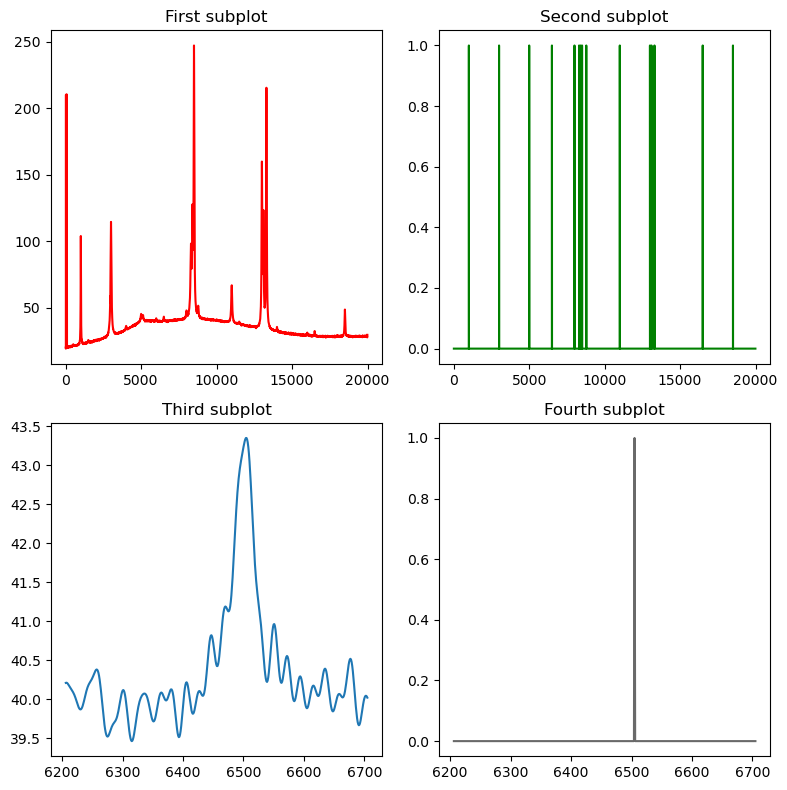

In [38]:
input = np.loadtxt('./data/dat_dummy_1.txt', skiprows = 2)
x = input[:,0]
y = input[:,1]

inrange = range(6200,6700)
winsize = len(y)//50

lag = 20
threshold = 3
influence = 0

result = SlidingWindow(y, winsize, threshold, influence, lag)
output = np.column_stack((result['index'],result['height']))

############## Visualize plots

## Figure with four subplots in a 2x2 grid
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

ax[0, 0].plot(x, y, color='red')
ax[0, 0].set_title('First subplot')
ax[0, 1].plot(x, result['signals'], color='green')
ax[0, 1].set_title('Second subplot')
ax[1, 0].plot(x[inrange], y[inrange])
ax[1, 0].set_title('Third subplot')
ax[1, 1].plot(x[inrange],result['signals'][inrange], color='dimgrey')
ax[1, 1].set_title('Fourth subplot')

## Adjust spacing
plt.tight_layout()
plt.show()

In [39]:
result

{'signals': array([0., 0., 0., ..., 0., 0., 0.]),
 'index': [995,
  2995,
  4992,
  6499,
  7994,
  8297,
  8396,
  8495,
  8775,
  10997,
  12995,
  13095,
  13295,
  16492,
  18496],
 'height': [81.67294187969925,
  84.25717669172931,
  6.322821328320799,
  3.2948683959899654,
  6.098102907268164,
  53.748255789473674,
  82.5518935839599,
  201.27490701754385,
  5.434633208020053,
  27.02464127819548,
  123.37967358395989,
  86.58633977443611,
  178.35814000000002,
  3.3156287468671692,
  19.771703759398502]}

In [40]:
df2 = pd.read_csv("./data/dataset_to_try.csv")

trace  = go.Scatter(
    x = [i for i in range(len(df2['pressure']))],
    y = [df2['time_passed']],
    mode = 'lines'
)

In [41]:
# %%script echo Skipping: Avoid to open browser and plot
""" Plot online opening browser at temp-plot.html"""
init_notebook_mode(connected=True)

data = [trace]
plotly.offline.plot(data)


'temp-plot.html'

In [42]:
ics = df2['time_passed'] 
ips = df2['pressure']
ics[:4], ips[:4]

(0     0
 1    12
 2    21
 3    33
 Name: time_passed, dtype: int64,
 0    0,076
 1    0,086
 2    0,088
 3    0,099
 Name: pressure, dtype: object)

In [43]:
""" Detecting peaks in the time series with  peakutils.indexes """

## Get the time series
time_series = df2['time_passed']
time_series = time_series.tolist()

# Convert to numpy array to pass to indexes
cb = np.array(time_series)
indices = peakutils.indexes(cb, thres=0.02/max(cb), min_dist=0.1)

# Create trace for original plot
trace = go.Scatter(
    x=[j for j in range(len(time_series))],
    y=time_series,
    mode='lines',
    name='Original Plot'
)
# Create trace for peak markers
trace2 = go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='rgb(255,0,0)',
        symbol='cross'
    ),
    name='Detected Peaks'
)
# Combine traces
data = [trace, trace2]
# Create layout
layout = go.Layout(title="Pressures", xaxis={'title':'x1'}, yaxis={'title':'x2'})
# Create figure
fig_go = go.Figure(data, layout=layout)
iplot(fig_go, filename='time_passed_pressures')
#iplot(fig_go, filename='time_passed_pressures', layout=layout)

In [44]:
# Generate x data
x = np.linspace(0, 10, 50) 

# Generate y data with peaks
y = np.sin(x) + np.cos(2*x) + np.random.randn(len(x))

# Create trace 
trace3 = go.Scatter(
    x = x,
    y = y,
    mode = 'lines',
    line = dict(color = 'mediumvioletred')
)

# Calculate max y value
ymax = max(y)
# Find index of max y value 
imax = np.argmax(y)
# Get x value at same index
xmax = x[imax]

# Create layout
layout3 = go.Layout(
    title='My Plot',
    xaxis={'title': 'X Axis'},
    yaxis={'title': 'Y Axis'},
    width=800,
    height=600,
    margin={'l': 50, 'r': 50, 't': 50, 'b': 50},
    font={'family': 'Arial', 'size': 18, 'color': 'olive'},
    legend={'x': 0.8, 'y': 0.1},
    annotations=[
        {
            'x': xmax,
            'y': ymax,
            'text': 'Maximum value',
            'showarrow': True,
            'arrowhead': 7,
            'ax': 20,
            'ay': -40
        }
    ]
)

# Create a Plotly figure
fig = go.Figure(data=[trace3], layout=layout3)
# Display the plot using iplot()
iplot(fig)

In [45]:
data

[Scatter({
     'mode': 'lines',
     'name': 'Original Plot',
     'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
           20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
     'y': [0, 12, 21, 33, 42, 59, 66, 73, 82, 99, 120, 130, 145, 177, 188, 200, 42,
           49, 21, 33, 42, 49, 33, 42, 49, 33, 42, 49, 33, 42, 49, 100]
 }),
 Scatter({
     'marker': {'color': 'rgb(255,0,0)', 'size': 8, 'symbol': 'cross'},
     'mode': 'markers',
     'name': 'Detected Peaks',
     'x': array([15, 17, 21, 24, 27]),
     'y': [200, 49, 49, 49, 49]
 })]

In [46]:
# Create some data for a scatter plot
x = ips
y = ics

# Create a dictionary with the data
scatter_data = {'x': x, 'y': y, 'mode': 'markers', 'name': 'My Scatter Plot'}

# Create a dictionary with the layout options
layout_data = {'title': 'Pressures in Time', 'xaxis': {'title': 'X Axis'}, 'yaxis': {'title': 'Y Axis'}}

# Create a dictionary with the data and layout
figure_data = {'data': [scatter_data], 'layout': layout_data}

# Display the plot using iplot()
iplot(figure_data)

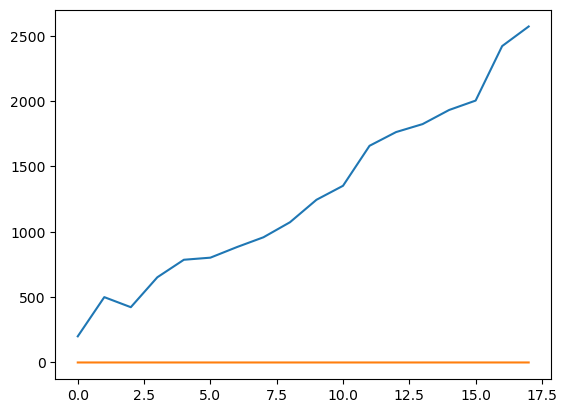

In [47]:
x = df.copy()
plt.plot(x);

In [51]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [58]:
# Specifying 'numeric_only=True' to avoid FutureWarnings
my_max = df.max(axis=0, numeric_only=True) 
my_min = df.min()
my_mean = df.mean(numeric_only=True)
my_median = df.median(numeric_only=True)
my_std = df.std(numeric_only=True)
dd = df.loc()

#print(dd)
print("My_max:") 
print(my_max) 
print("My_min:")  
print(my_min)  
print("My_mean:") 
print(my_mean) 
print("My_median:") 
print(my_median) 
print("My_std:") 
print(my_std) 

df.describe()

My_max:
year         2.007000e+03
lifeExp      8.260300e+01
pop          1.318683e+09
gdpPercap    1.135231e+05
iso_num      8.940000e+02
dtype: float64
My_min:
country      Afghanistan
continent         Africa
year                1952
lifeExp           23.599
pop                60011
gdpPercap     241.165876
iso_alpha            AFG
iso_num                4
dtype: object
My_mean:
year         1.979500e+03
lifeExp      5.947444e+01
pop          2.960121e+07
gdpPercap    7.215327e+03
iso_num      4.258803e+02
dtype: float64
My_median:
year         1.979500e+03
lifeExp      6.071250e+01
pop          7.023596e+06
gdpPercap    3.531847e+03
iso_num      4.100000e+02
dtype: float64
My_std:
year         1.726533e+01
lifeExp      1.291711e+01
pop          1.061579e+08
gdpPercap    9.857455e+03
iso_num      2.483057e+02
dtype: float64


,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


In [60]:
# Assing to a new column 'here' a one-dimensional ndarray with axis labels
df3 = df.assign(here=pd.Series(np.random.randn(1704)).values)
df3

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,here
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,1.778253
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,-0.765835
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,-2.085795
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,2.426200
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,-0.346839
...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716,-0.063513
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716,0.501995
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716,0.159983
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716,-0.319601


In [66]:
""" Line Plots """
df = px.data.gapminder()

fig = px.line(df3, x="iso_num", y="pop", color="country")
fig.show()

In [62]:
""" Bars """
df = px.data.gapminder().groupby(['year','continent'])['pop'].sum().reset_index()
fig = px.bar(df, x="year", y="pop", color="continent")
fig.show()

In [63]:
""" Histograms """
df = px.data.iris()
fig = px.histogram(df, x="petal_length")
fig.show()

In [67]:
""" Scatters """
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [69]:
""" Heatmaps """
fig = px.density_heatmap(df, x="sepal_width", y="sepal_length")
# Reduce image
fig.update_layout(width=500,height=500)
fig.show()